In [ ]:
#Delivery_time -> Predict delivery time using sorting time 

# Importing Data set

In [1]:
import pandas as pd 
import numpy as np

In [2]:
data = pd.read_csv("delivery_time.csv")

In [3]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
data.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [7]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


# Rename the columns

In [8]:
data=data.rename({'Delivery Time': 'DT'}, axis=1)
data=data.rename({'Sorting Time': 'ST'}, axis=1)

In [9]:
data

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Correlation

In [11]:
data.corr()

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


# Data Visualization

In [13]:
pip install seaborn --upgrade

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
  Using cached matplotlib-3.7.1-cp39-cp39-win_amd64.whl (7.6 MB)
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2
Note: you may need to restart the kernel to use updated packages.


In [15]:
import seaborn as sns
import warnings 

C:\Users\vinod kumar N\AppData\Local\Temp\ipykernel_15852\2019243014.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['DT'])


<Axes: xlabel='DT', ylabel='Density'>

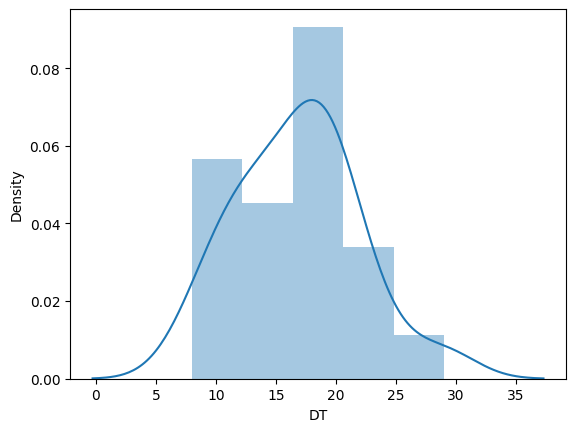

In [16]:
sns.distplot(data['DT'])

C:\Users\vinod kumar N\AppData\Local\Temp\ipykernel_15852\4201415624.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ST'])


<Axes: xlabel='ST', ylabel='Density'>

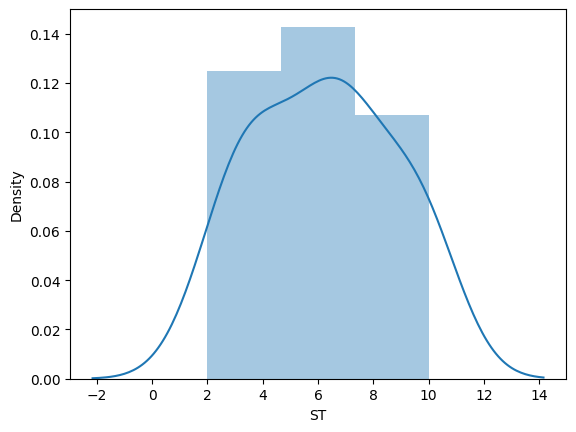

In [17]:
sns.distplot(data['ST'])

In [18]:
import matplotlib.pyplot as plt 

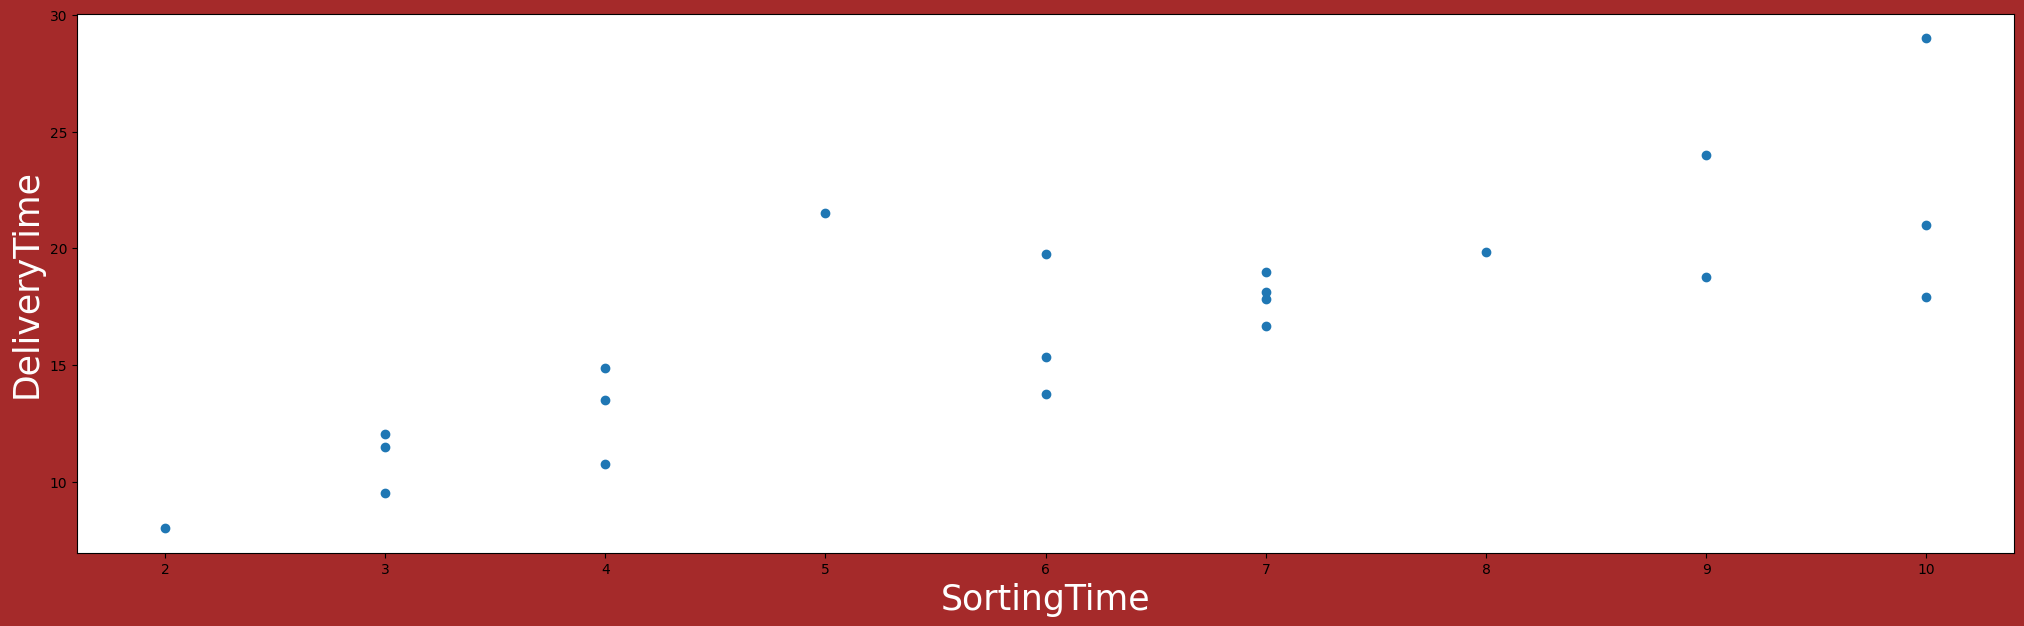

In [19]:
plt.figure(figsize=(25,7),facecolor="brown")
plt.scatter(data.ST,data.DT)
plt.xlabel("SortingTime",color="white",size=25)
plt.ylabel("DeliveryTime",color="white",size=25)
plt.show()

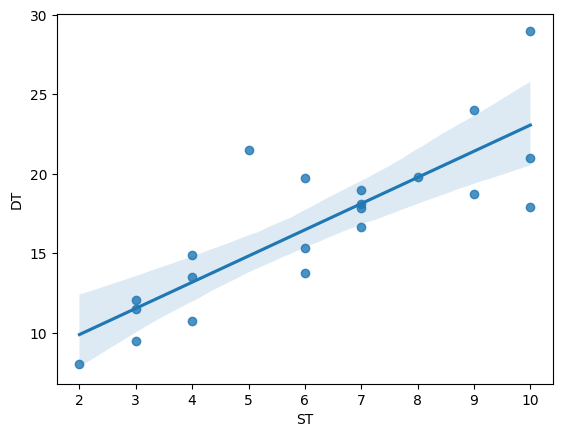

In [20]:
sns.regplot(x="ST" ,y="DT" ,data=data);

# Stat model 1

In [21]:
import statsmodels.formula.api as smf

In [22]:
model1= smf.ols("DT~ST" ,data=data).fit()

In [23]:
model1

In [24]:
predicted1=model1.predict()

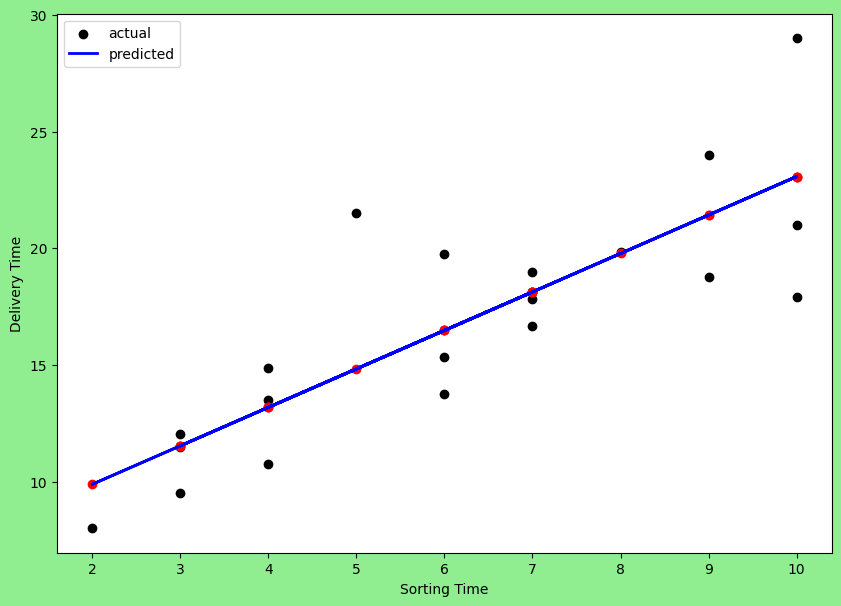

In [27]:
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(data.ST,data.DT,color="black",label="actual")
plt.plot(data.ST,predicted1,label="predicted",color="blue",linewidth=2)
plt.scatter(data.ST,predicted1,color="red")
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")
plt.legend(loc="best")
plt.show()

In [28]:
#coefficients
model1.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [29]:
#Tvalue and Pvalue

In [32]:
print(model1.tvalues , '\n', model1.pvalues)

Intercept    3.823349
ST           6.387447
dtype: float64 
 Intercept    0.001147
ST           0.000004
dtype: float64


In [33]:
#R squared values
(model1.rsquared,model1.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [35]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           3.98e-06
Time:                        11:22:32   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Stat model 2

In [37]:
import numpy as np
model2= smf.ols('DT~np.log(ST)' ,data=data).fit()

In [38]:
predicted2=model2.predict()

In [39]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           2.64e-06
Time:                        11:24:18   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(ST)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Stat model 3

In [40]:
model3= smf.ols("np.log(DT)~ST" ,data=data).fit()

In [41]:
predicted3=np.exp(model3.predict())

In [42]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(DT)   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           1.59e-06
Time:                        11:25:26   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
ST             0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Stat model 4

In [43]:
ST_sqr=(data.ST**2)

In [44]:
model4= smf.ols("np.log(DT)~ST+ST_sqr" ,data=data).fit()

In [45]:
predicted4=np.exp(model4.predict())

In [46]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(DT)   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     29.28
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           2.20e-06
Time:                        11:26:44   Log-Likelihood:                 9.9597
No. Observations:                  21   AIC:                            -13.92
Df Residuals:                      18   BIC:                            -10.79
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6997      0.228      7.441      0.000       1.220       2.180
ST             0.2659      0.080      3.315      0.004       0.097       0.434
ST_sqr        -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Predict delivery time using sorting time

In [47]:
data_pred= pd.DataFrame(data,columns=['ST'])

In [48]:
pred_data=model4.predict(data_pred)

In [52]:
print(' actual delivery time ' ' \n ', data['DT'] ,'\n' 'predicted delivery␣↪time' '\n',np.exp(pred_data))


 actual delivery time  
  0     21.00
1     13.50
2     19.75
3     24.00
4     29.00
5     15.35
6     19.00
7      9.50
8     17.90
9     18.75
10    19.83
11    10.75
12    16.68
13    11.50
14    12.03
15    14.88
16    13.75
17    18.11
18     8.00
19    17.83
20    21.50
Name: DT, dtype: float64 
predicted delivery␣↪time
 0     21.646921
1     12.909227
2     16.995933
3     21.176938
4     21.646921
5     16.995933
6     18.764526
7     10.825502
8     21.646921
9     21.176938
10    20.191891
11    12.909227
12    18.764526
13    10.825502
14    10.825502
15    12.909227
16    16.995933
17    18.764526
18     8.847949
19    18.764526
20    15.003730
dtype: float64


In [53]:
#predicted delivery time for same sorting time
np.exp(pred_data)

0     21.646921
1     12.909227
2     16.995933
3     21.176938
4     21.646921
5     16.995933
6     18.764526
7     10.825502
8     21.646921
9     21.176938
10    20.191891
11    12.909227
12    18.764526
13    10.825502
14    10.825502
15    12.909227
16    16.995933
17    18.764526
18     8.847949
19    18.764526
20    15.003730
dtype: float64

In [54]:
data['PRED DATA'] =np.exp(pred_data)
data

,DT,ST,PRED DATA
0,21.00,10,21.646921
1,13.50,4,12.909227
2,19.75,6,16.995933
3,24.00,9,21.176938
4,29.00,10,21.646921
5,15.35,6,16.995933
6,19.00,7,18.764526
7,9.50,3,10.825502
8,17.90,10,21.646921
9,18.75,9,21.176938
